# AR Model

**uspopulation.csv**

# Introduction to ARIMA Models

ARIMA performs very well when working with a time series where the data is directly related to the time stamp, where we can saw clear growth and seasonality based on time (like airline passengers dataset)<br>
Ther are variety of different forecasting models , but they all stem from ARIMA.

<strong>ARIMA</strong>, or <em>Autoregressive Integrated Moving Average</em> is actually a combination of 3 models:
* <strong>AR(p)</strong> Autoregression - a regression model that utilizes the dependent relationship between a current observation and observations over a previous period
* <strong>I(d)</strong> Integration - uses differencing of observations (subtracting an observation from an observation at the previous time step) in order to make the time series stationary .. will apply differencing to make a time series stationary, which ARIMA requires..Each order differencing step comes at losing a row of data
* <strong>MA(q)</strong> Moving Average - a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations..we've already seen with EWMA and the Holt-Winters Method.
<br>

**Non-Seasonal ARIMA** models are generally denoted ARIMA(p,d,q) where parameters p,d,q are non-negative integers<br>
**Seasonal ARIMA(SARIMA)** very similar to ARIMA but adds another set of parameters p,d,q for the seasonal component <br>

To choose the $p$, $d$ and $q$ values required by the model, there are two methods:-<br>
* AutoCorrelation Plots and Partial AutoCorrelation Plots (Difficult method)
* Grid search(Run ARIMA models on different combination of p,d,q and compare the models for an evaluation metrics


**To check for the stationary of data, we can use different mathematical test such as Augmented Dickey-Fuller Test**

## Auto Regression Model

If we drop the intergrated and Moving average components, then we are only left with AR

In an autoregression model, we forecast using a linear combination of <em>past values</em> of the variable. The term <em>autoregression</em> describes a regression of the variable against itself. An autoregression is run against a set of <em>lagged values</em> of order $p$.<br>

AR model specifies that the output variable depends linearly on its own previous values and on a stochastic term (an imperfectly predictable term)

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
# Load specific forecasting tools
from statsmodels.tsa.ar_model import AR,ARResults

In [3]:
# Load the U.S. Population dataset
df = pd.read_csv('Data/uspopulation.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'

In [4]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


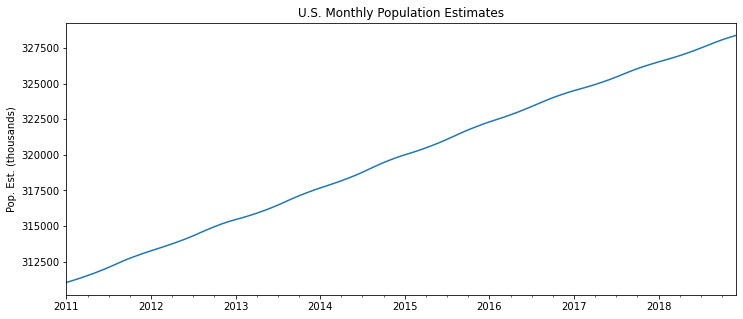

In [5]:
#Plotting the source data

title='U.S. Monthly Population Estimates'
ylabel='Pop. Est. (thousands)'
xlabel='' # we don't really need a label here

ax = df['PopEst'].plot(figsize=(12,5),title=title);
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [6]:
len(df)

96

### Train-Test Split

In [7]:
# Set one year for testing
train = df.iloc[:84]
test = df.iloc[84:]

### Fit an AR(1) Model   --   (order 1)

In [8]:
#Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [9]:
model = AR(train['PopEst'])

In [10]:
AR1fit = model.fit(maxlag=1)
#Play with the parameter like maxlag:- defining the no. of lags
#Using the default method--'cmle', we can also use 'mle'

In [11]:
print(f'Lag: {AR1fit.k_ar}') #How many lags
print(f'Coefficients:\n{AR1fit.params}')

Lag: 1
Coefficients:
const        284.913797
L1.PopEst      0.999686
dtype: float64


In [12]:
# This is the general format for obtaining predictions (AR uses .predict())
start=len(train) # 84
end=len(train)+len(test)-1 #95 #Predicting the test data 
predictions1 = AR1fit.predict(start=start, end=end, dynamic=False).rename('AR(1) Predictions')

In [13]:
#Predicted data
predictions1

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, Name: AR(1) Predictions, dtype: float64

In [14]:
#Original Data
test

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


In [15]:
# Comparing predictions to expected values
for i in range(len(predictions1)):
    print(f"predicted={predictions1[i]}, expected={test['PopEst'][i]}")

predicted=326560.4033766864, expected=326527
predicted=326742.74946321605, expected=326669
predicted=326925.03827758296, expected=326812
predicted=327107.26983777544, expected=326968
predicted=327289.44416177616, expected=327134
predicted=327471.56126756215, expected=327312
predicted=327653.6211731048, expected=327502
predicted=327835.6238963698, expected=327698
predicted=328017.56945531734, expected=327893
predicted=328199.4578679018, expected=328077
predicted=328381.289152072, expected=328241
predicted=328563.06332577113, expected=328393


<AxesSubplot:xlabel='DATE'>

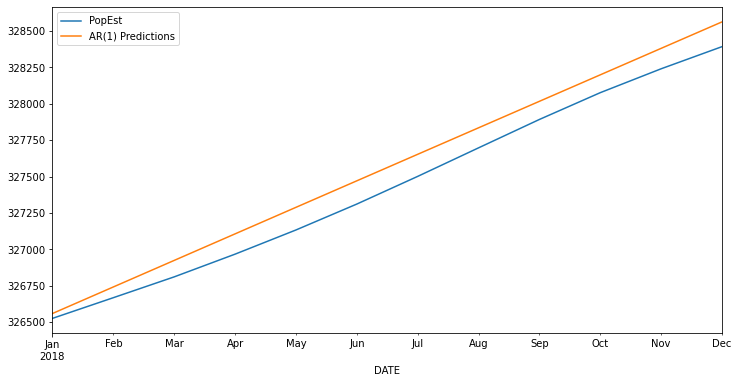

In [16]:
test['PopEst'].plot(legend=True,figsize=(12,6))
predictions1.plot(legend=True)

**Fit an AR(2) Model**

In [17]:
model1 = AR(train['PopEst'])

In [18]:
AR2fit = model1.fit(maxlag=2,method='cmle')

In [19]:
print(f'Lag: {AR2fit.k_ar}') #How many lags
print(f'Coefficients:\n{AR2fit.params}')

Lag: 2
Coefficients:
const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64


In [20]:
# This is the general format for obtaining predictions (AR uses .predict())
start=len(train) # 84
end=len(train)+len(test)-1 #95
predictions2 = AR2fit.predict(start=start, end=end, dynamic=False).rename('AR(2) Predictions')

In [21]:
predictions2

2018-01-01    326535.672503
2018-02-01    326694.718510
2018-03-01    326854.882249
2018-04-01    327015.944947
2018-05-01    327177.719497
2018-06-01    327340.045893
2018-07-01    327502.787327
2018-08-01    327665.826842
2018-09-01    327829.064475
2018-10-01    327992.414803
2018-11-01    328155.804852
2018-12-01    328319.172299
Freq: MS, Name: AR(2) Predictions, dtype: float64

In [22]:
test

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


In [23]:
# Comparing predictions to expected values
for i in range(len(predictions2)):
    print(f"predicted={predictions2[i]}, expected={test['PopEst'][i]}")

predicted=326535.67250300496, expected=326527
predicted=326694.71850971784, expected=326669
predicted=326854.8822487953, expected=326812
predicted=327015.9449469316, expected=326968
predicted=327177.71949673706, expected=327134
predicted=327340.0458930291, expected=327312
predicted=327502.78732680064, expected=327502
predicted=327665.8268420877, expected=327698
predicted=327829.0644746166, expected=327893
predicted=327992.41480280145, expected=328077
predicted=328155.80485166865, expected=328241
predicted=328319.1722988474, expected=328393


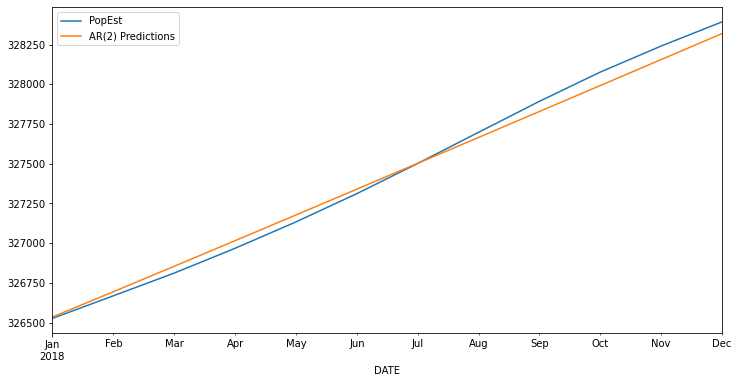

In [24]:
test['PopEst'].plot(legend=True,figsize=(12,6))
predictions2.plot(legend=True);

**Fit an AR(p) Model whose statsmodel chooses p**

In [25]:
model3 = AR(train['PopEst'])

In [27]:
ARfit = model3.fit(method='cmle')
#If we leave maxlag as none, statsmodels will automatically find it out for us
#Also we can use 'ic' parameter --criteria used for selecting the optimal lag length(best is 'aic' value)

In [28]:
print(f'Lag: {ARfit.k_ar}') #How many lags
print(f'Coefficients:\n{ARfit.params}')

# It selected 11 lags

Lag: 11
Coefficients:
const         96.143523
L1.PopEst      2.298626
L2.PopEst     -2.027441
L3.PopEst      1.356878
L4.PopEst     -1.171630
L5.PopEst      0.816723
L6.PopEst     -0.699990
L7.PopEst      0.727004
L8.PopEst     -0.354790
L9.PopEst      0.241036
L10.PopEst    -0.179865
L11.PopEst    -0.006819
dtype: float64


In [29]:
# This is the general format for obtaining predictions (AR uses .predict())
start=len(train) # 84
end=len(train)+len(test)-1 #95
predictions_p = ARfit.predict(start=start, end=end, dynamic=False).rename('AR(p) Predictions')

In [30]:
predictions_p

2018-01-01    326522.437732
2018-02-01    326657.203151
2018-03-01    326791.719121
2018-04-01    326934.213920
2018-05-01    327090.975005
2018-06-01    327262.110719
2018-07-01    327444.342498
2018-08-01    327632.521895
2018-09-01    327819.207176
2018-10-01    327997.438495
2018-11-01    328161.809335
2018-12-01    328310.763869
Freq: MS, Name: AR(p) Predictions, dtype: float64

In [31]:
test

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


In [32]:
# Comparing predictions to expected values
for i in range(len(predictions_p)):
    print(f"predicted={predictions_p[i]}, expected={test['PopEst'][i]}")

predicted=326522.43773231166, expected=326527
predicted=326657.20315060223, expected=326669
predicted=326791.7191209823, expected=326812
predicted=326934.2139198615, expected=326968
predicted=327090.97500515357, expected=327134
predicted=327262.1107188993, expected=327312
predicted=327444.3424980407, expected=327502
predicted=327632.52189472475, expected=327698
predicted=327819.20717573335, expected=327893
predicted=327997.43849547696, expected=328077
predicted=328161.8093349876, expected=328241
predicted=328310.7638686569, expected=328393


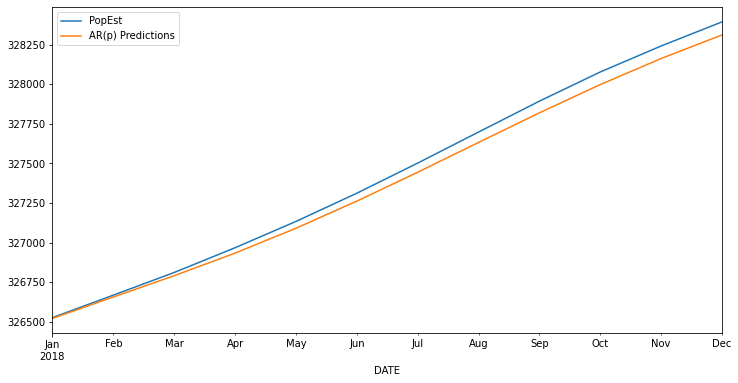

In [33]:
test['PopEst'].plot(legend=True,figsize=(12,6))
predictions_p.plot(legend=True);

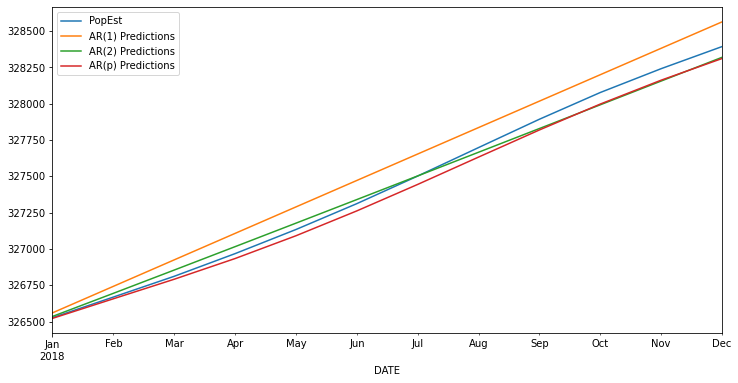

In [34]:
#Comparison with different AR models
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions_p.plot(legend=True,figsize=(12,6));

### Evaluate the model

In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
labels = ['AR(1)','AR(2)','AR(11)']
preds = [predictions1, predictions2, predictions_p]  # these are variables, not strings!

In [37]:
for i in range(3):
    error = mean_squared_error(test['PopEst'], preds[i])
    print(f'{labels[i]} Error: {error:11.10}')

AR(1) Error: 17449.71424
AR(2) Error: 2713.258957
AR(11) Error: 3206.167517


We see right away how well AR(11) outperformed the other two models.

Another method is the **Akaike information criterion (AIC)**, which does a better job of evaluating models by avoiding overfitting.
<br>
Fortunately this is available directly from the fit model object.

In [38]:
modls = [AR1fit,AR2fit,ARfit]
for i in range(3):
    print(f'{labels[i]} AIC: {modls[i].aic:6.5}')

AR(1) AIC: 6.4108
AR(2) AIC: 5.0793
AR(11) AIC:  3.561


### Forecasting

In [39]:
# First, retrain the model on the full dataset
model = AR(df['PopEst'])

In [40]:
# Next, fit the model on the best maxlag,we can do it maxlag=11 , i am doing it to let the model do again
ARfit = model.fit(method='cmle')

In [41]:
# Make predictions
fcast = ARfit.predict(start=len(df), end=len(df)+12, dynamic=False).rename('Forecast')

#Predicting next year
#How much we took for the test data, it is better to forecast that much only, as we have seen the accuracy for that particular duration

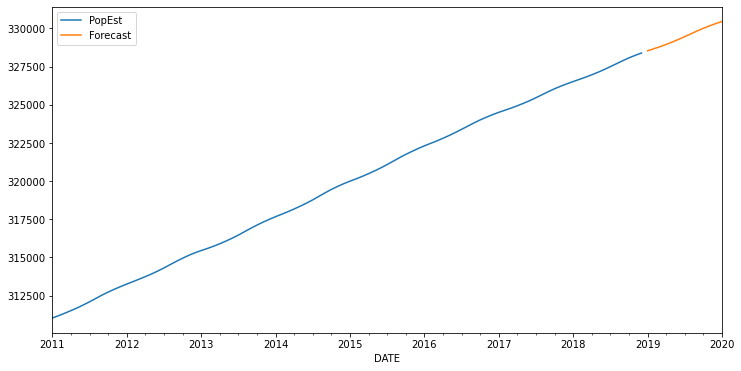

In [42]:
# Plot the results
df['PopEst'].plot(legend=True)
fcast.plot(legend=True,figsize=(12,6));